**Hola!**

Mi nombre es Maria Efimova, voy a revisar tu proyecto. Encantada de conocerte :)
Está bien si hablamos en 'Tú'? Por favor, dime si eso no está bien para tí, lo cambiaremos. SOy miguel cientifico de datos de mercado libre y tomare la segunda iteracion ! 

Mi trabajo no es señalar los errores que cometiste, sino compartir mi experiencia y ayudarte a convertirte en analista de datos. Ya has trabajado mucho en el proyecto, pero vamos a hacerlo aún mejor. A continuación encontrará mis comentarios; no los mueva, modifique ni elimine. Usaré marcas de color:


<div class="alert alert-danger">
<b>❌ Comentario del revisor:</b> Esto destaca los comentarios más importantes. Sin su desarrollo, el proyecto no será aceptado. </div>


<div class="alert alert-warning">
<b>⚠️ Comentario del revisor:</b> Así que los pequeños comentarios están resaltados. Se aceptan uno o dos comentarios de este tipo en el borrador, pero si hay más, deberá hacer las correcciones. Es como una tarea de prueba al solicitar un trabajo: muchos pequeños errores pueden hacer que un candidato sea rechazado.

</div>

<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b> Así que destaco todos los demás comentarios.</div>

Vamos a trabajar en el proyecto en un diálogo: si cambias algo en el proyecto o respondes a mis comentarios, escribe sobre eso. Será más fácil para mí seguir los cambios si resaltas tus comentarios asi:
<div class="alert alert-info"> <b>Comentario del estudiante:</b> Por ejemplo, asi.</div>

Todo esto ayudará a volver a revisar tu proyecto más rápido.
 

Recuerde que, si quieres dejarme un comentario en alguna parte del documento, sólo tiene que dar doble clic sobre la celda de arriba, copiar el código, pegarlo en una nueva celda y sustituir la frase "En celdas como estas puede dejarme sus comentarios" por su propio comentario. Asegúrese sólamente que la celda donde usted vaya a incluir su comentario esté en formato "Markdown".

Respecto del proceso de revisión, esta es la <b>primera iteración</b> para este ejercicio. Su proyecto será aceptado una vez que los comentarios en rojo hayan sido atendidos. Al final de este Notebook encontrará comentarios con mis observaciones finales.

# Juegos

## Decripción del proyecto

Determinacón de patrones determinantes en el éxito de un videojuego, con lo que se detectará proyectos prometedores, planificando campañas publicitarias.

## Cargar los datos

Se cargan las librerias para trabajar

In [1]:
import pandas as pd
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt

Se carga la tabla con los datos.

In [2]:
try:
    data = pd.read_csv('games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')

## Preparación de los datos

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Se cambiarán los nombres de las columas cambiando a lowercase todos

In [4]:
data.columns = data.columns.str.lower()

In [5]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

En la columna `user_score` se tiene un valor *tbd* el cual se cambiará por 0.0
Se cambiará el tipo de datos de la columna `user_score` de *Object* a *float*

In [6]:
data['user_score'] = data['user_score'].replace('tbd', 0.0)

In [7]:
data['user_score'] = data['user_score'].astype('float64')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Se buscan la cantidad de valores ausentes en el DataFrame

In [9]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Se filtra la columna `name` con los valores ausentes para determinar la razón de por que están ausentes.

In [10]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Estos datos al parecer son de juegos que no salieron al mercado o errores de entrada, estos datos ausentes en name se eliminarán

In [11]:
data = data.dropna(subset=['name'])
data.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

Se filtará la columna `year_of_release` buscando un patrón para llenar los valores ausentes

In [12]:
data[data['year_of_release'].isna()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,0.0,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


Para estos datos se usará la `median` de las plataformas para llenar estos valores

In [13]:
data['year_of_release'].fillna(data.groupby('platform')['year_of_release'].transform("median"),inplace=True)


<div class="alert alert-warning">
<b>⚠️ Comentario del revisor:</b> La mejor solucion es condicionar por juego, puedes tener un año de release para una consola y otra no. La media puede ser una estadistica que te puede generar ruido en los datos para este caso.
</div>

In [14]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

En la columna `critic_score` se encuentran más valores ausentes que en `user_critic` se va a llenar los valores ausentes, agrupando la información por la columna `genre` llenando con el promedio de las criticas

In [15]:
data['critic_score'].fillna(data.groupby(['genre'])['critic_score'].transform("mean"),inplace=True)
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score         6699
rating             6764
dtype: int64

La columna sigue presentando valores ausentes, se buscará un patrón para estos valores

In [16]:
data[data['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Los juegos salidos en 2016, se sustituirá el valor de `critic_socore`por 0, ya que es un juego nuevo

La columna `user_score` se trabajará de la misma forma que `critic_score`

In [17]:
data['user_score'].fillna(data.groupby(['genre'])['user_score'].transform("mean"),inplace=True)
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6764
dtype: int64

Para la columna `rating` utilizaremos el genero para determinar el valor a sustituir, por lo regular un mismo genero contiene la misma clasificación *ESRB* para ellos crearemos categorías númericas en la columna `rating_category`

<div class="alert alert-warning">
<b>⚠️ Comentario del revisor:</b> Lo mejor es dejar los valroes de score y rating nans tambien ! 

</div>

In [18]:
#Primero obtenemos las categorias que aparecen en el DataFrame

data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [19]:
def rating_category(rating):
    if rating == 'E':
        return 0
    if rating == 'M':
        return 1
    if rating == 'T':
        return 2
    if rating == 'E10+':
        return 3
    if rating == 'K-A':
        return 4
    if rating == 'AO':
        return 5
    if rating == 'EC':
        return 6
    if rating == 'RP':
        return 7

<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b> Aqui bien! Tambien puedes usar aqui 'case'

In [20]:
data['rating_category'] = data['rating'].apply(rating_category)
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_category
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.000000,8.000000,E,0.0
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,68.058350,5.511464,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.000000,8.300000,E,0.0
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.000000,8.000000,E,0.0
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,72.652646,7.323803,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,66.629101,5.851723,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,71.968174,5.064776,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,65.331269,4.662092,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,68.058350,5.511464,NaN,NaN


In [21]:
data['rating_category'].fillna(data.groupby(['genre'])['rating_category'].transform("median"),inplace=True)

In [22]:
def rating_fillna(row):
    rating_category = row['rating_category']
    rating = row['rating']
    
    if not pd.isna(rating):
        return rating
    try:
        if rating_category == 0:
            return 'E'
        if rating_category == 1:
            return 'M'
        if rating_category == 2:
            return 'T'
        if rating_category == 3:
            return 'E10+'
        if rating_category == 4:
            return 'K-A'
        if rating_category == 5:
            return 'AO'
        if rating_category == 6:
            return 'EC'
        if rating_category == 7:
            return 'RP'
    except KeyError:
        return rating

In [23]:
new = data.apply(rating_fillna,axis=1)
data['rating']= new
data.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
rating_category    0
dtype: int64

Se creará la columna `total_sales` sumando las columnas `na_sales`, `eu_sales`, `jp_sales` y `other_sales`

In [24]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [25]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_category,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.000000,8.000000,E,0.0,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,68.058350,5.511464,E,0.0,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.000000,8.300000,E,0.0,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.000000,8.000000,E,0.0,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,72.652646,7.323803,T,2.0,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,66.629101,5.851723,T,2.0,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,71.968174,5.064776,E,0.0,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,65.331269,4.662092,M,1.0,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,68.058350,5.511464,E,0.0,0.01


<div class="alert alert-warning">
<b>⚠️ Comentario del revisor:</b> Recuerda agregar conclusiones intermedias ! 
</div>

## Analizando los datos

Se muestra la cantidad de juegos lanzados por año

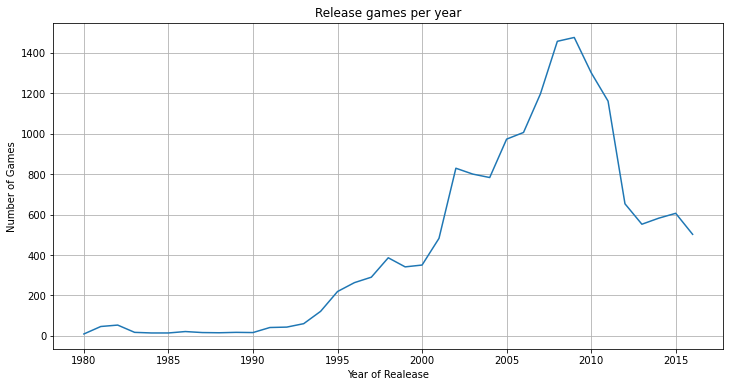

In [26]:
data.groupby('year_of_release')['name'].count().plot(kind='line',grid=True,figsize=(12,6))
plt.title('Release games per year')
plt.xlabel('Year of Realease')
plt.ylabel('Number of Games')
plt.show()

<div class="alert alert-warning">
<b>⚠️ Comentario del revisor:</b> Podrias agregar conclusiones intermedias a partir del grafico

</div>

### Ventas por plataforma por año

In [27]:
most_sold_platforms = list(
    data
    .groupby('platform')['total_sales']
    .sum()
    .reset_index()
    .sort_values(by='total_sales', ascending=False)
    .head(10)['platform']
)

In [28]:
most_sold_platforms

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC']

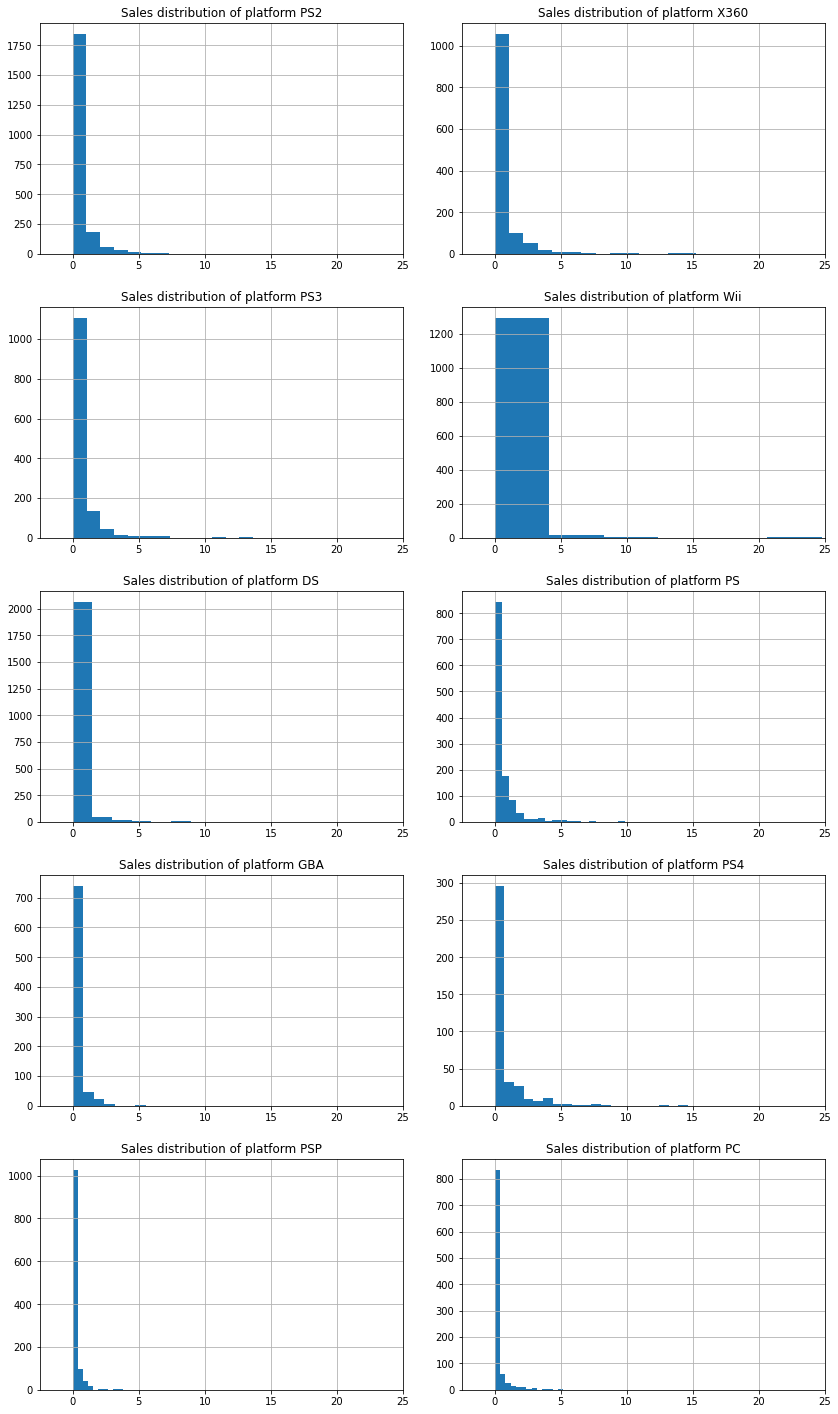

In [29]:
fig, ax = plt.subplots(ncols=2, nrows=5, figsize=(12, 20))

for i, platform in enumerate(most_sold_platforms):
    data_tmp = data.query("platform==@platform")
    
    ax.flatten()[i].set_title(f"Sales distribution of platform {platform}")
    ax.flatten()[i].set_xlim(-2.5,25)
    
    data_tmp['total_sales'].hist(bins=20, ax=ax.flatten()[i])
    
    fig.tight_layout(pad=2.0)

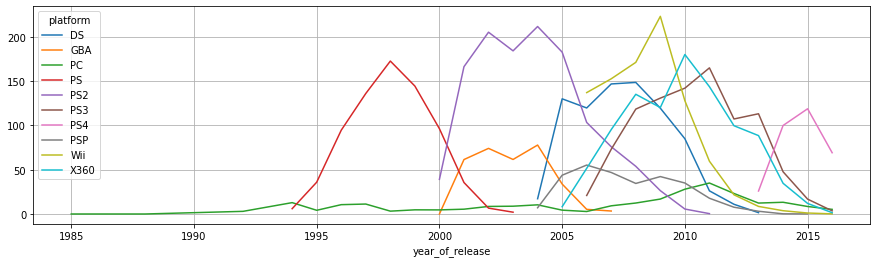

In [30]:
sales_by_popular_platform = (
    data
    .query("platform in @most_sold_platforms")
    .pivot_table(index="year_of_release",columns='platform',values='total_sales', aggfunc='sum')
    .sort_values(by='year_of_release',ascending=False)
)
sales_by_popular_platform.plot(kind='line', figsize=(15,4), grid=True)
plt.show()

<div class="alert alert-warning">
<b>⚠️ Comentario del revisor:</b> Recuerda, aca la ides es filtar el periodo de estudio, te recomiendo maximo 5 años.

</div>

De acuerdo con la gráfica presentada arriba, las plataformas pareciera que tiene un periodo de 10 años para mantener las ventas, siendo los primeros 5 años son los del incremento de ventas totales, hay casos en los que la vida de la plataforma se extiende por más años, como los es *PC* la cual sigue vigente desde 1985 a la fecha con caídas en ventas.

Tomando la gráfica anterior se trabajará con el período de 1994 a 2016.
Por lo que las plataformas más prolificas al momento son *x360*, *PS3*, *DS* en base al tamaño de las ventas contra el tiempo que han estado en el mercado.

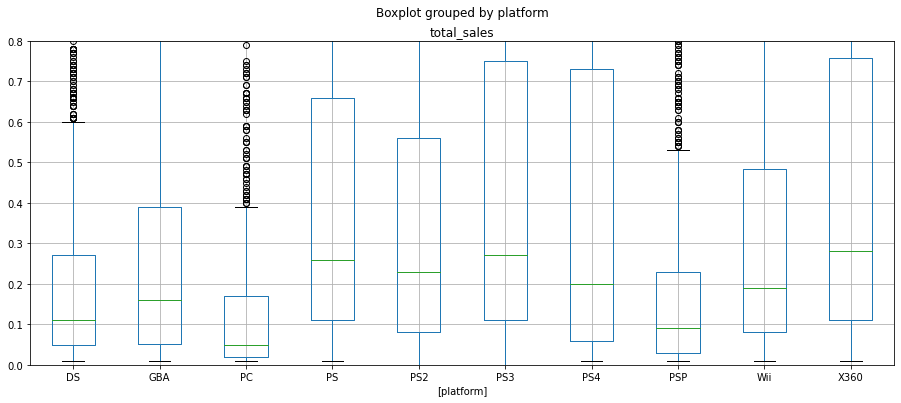

In [31]:
(
    data
    .query("platform in @most_sold_platforms")[['platform','total_sales']]
    .boxplot(by='platform', figsize=(15,6))
)
plt.ylim(0,0.8)
plt.show()


De acuerdo con el diagrama de cajas, el promedio de ventas de todas las plataformas ronda desde 0.05 a cerca de 0.3 siendo la plataforma de *X360* como la que tiene el mayor promedio de ventas, y un cuartil superior más amplio.
Cerca de *X360* se encuentra *PS3* que historicamente son las plataformas que más competencia entre ellos han tenido a la fecha.

<div class="alert alert-warning">
<b>⚠️ Comentario del revisor:</b> Podrias mejorar la grafica de boxplot con seaborn. Tambien te recomiendo saccar el boxplot por genero. Nos dara una idea de los generos que mas venden.

</div>

Se realiza el análisis de la influencia de las críticas de los expertos y los usuarios sobre las ventas en una plataforma, en este caso se hará con *X360*.

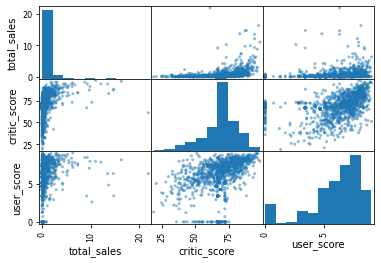

In [32]:
pd.plotting.scatter_matrix(
    data
    .query("platform == 'X360'")[['total_sales','critic_score','user_score']]
)
plt.show()

In [33]:
data[['total_sales','critic_score','user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.205781,0.139921
critic_score,0.205781,1.000000,0.368715
user_score,0.139921,0.368715,1.000000


Las ventas totales de la plataforma *X360*, tienen una dependencia positiva respecto a las críticas de los expertos, al igual que con las críticas de los usuarios, es decir mientras mejores comentarios reciba un juego de parte de expertos y usuarios más probable que el juego tenga éxito en dicha plataforma. Y aún así la influencia de los comentarios de los usuarios tienen menor peso en la compra de los juegos por esta plataforma.

In [34]:
#Se filtran los juegos que fueron lanzados en diferentes plataformas

platform_games = list(
    data
    .groupby("name")['platform']
    .nunique()
    .reset_index()
    .query("platform >1")["name"]
)

In [35]:
#Se filtran los juegos con mayor número de ventas en todas las plataformas

most_sold_games = list(
     data
    .query("name in @platform_games")
    .groupby('name')['total_sales']
    .sum()
    .reset_index()
    .sort_values(by='total_sales', ascending=False)
    .head(5)['name']
)

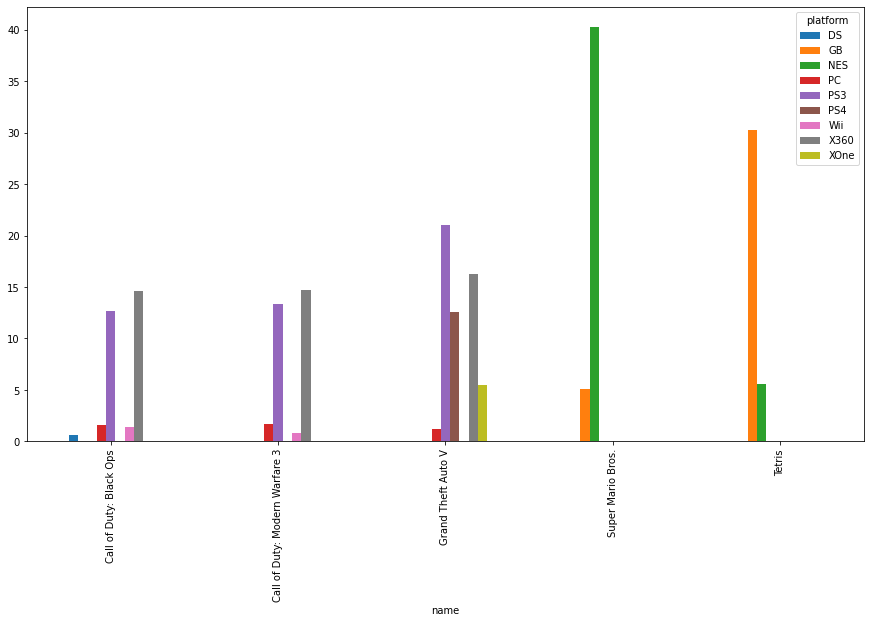

In [36]:
(
    data
    .query('name in @most_sold_games')
    .pivot_table(index='name', columns='platform', values='total_sales', aggfunc='sum')
    .plot(kind='bar', figsize=(15,8))
)
plt.show()

In [37]:
most_sold_genre = list(
    data
    .groupby('genre')['total_sales']
    .sum()
    .reset_index()
    .sort_values(by='total_sales', ascending=False)
    .head(10)['genre']
)

In [38]:
most_sold_genre

['Action',
 'Sports',
 'Shooter',
 'Role-Playing',
 'Platform',
 'Misc',
 'Racing',
 'Fighting',
 'Simulation',
 'Puzzle']

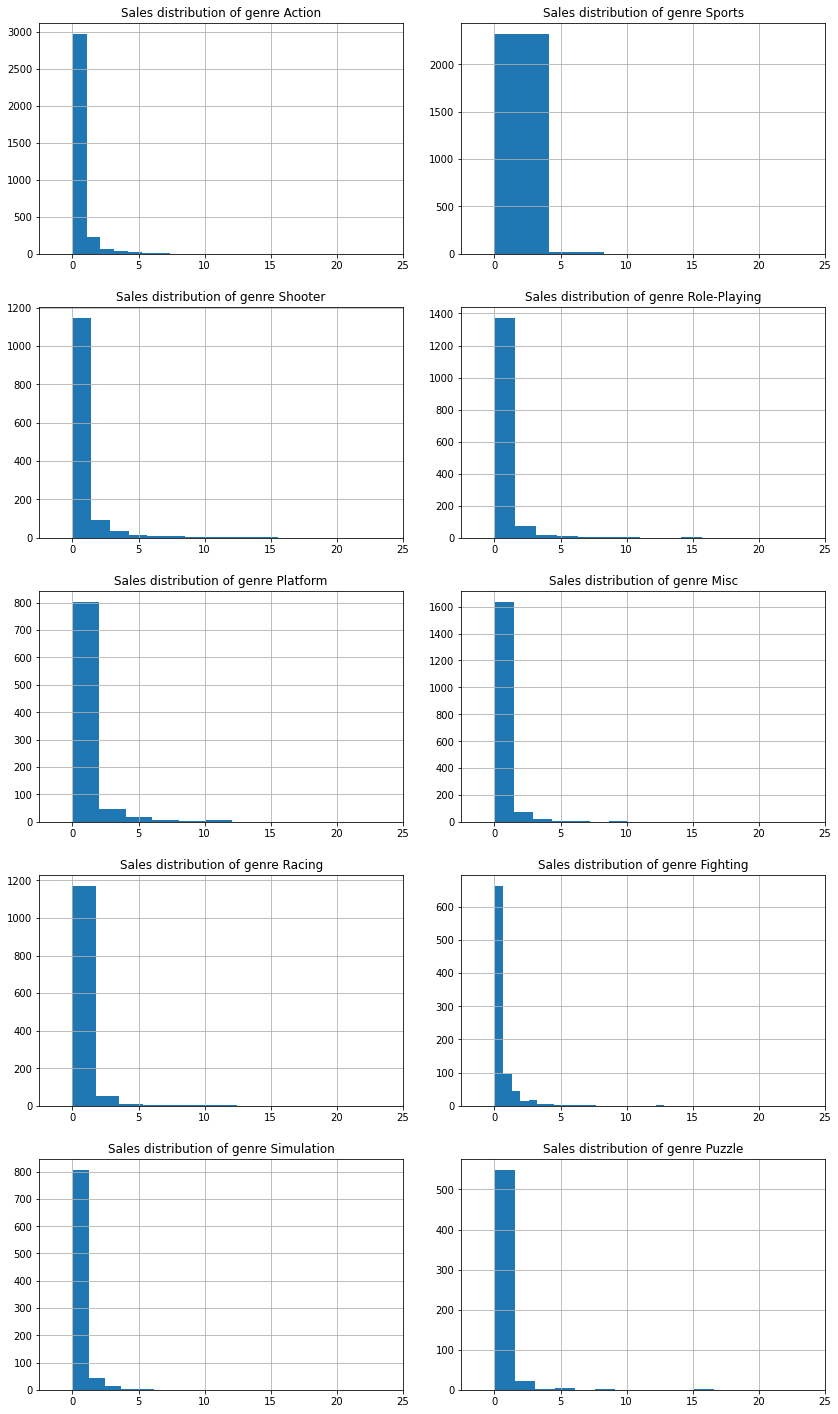

In [39]:
fig, ax = plt.subplots(ncols=2, nrows=5, figsize=(12, 20))

for i, genre in enumerate(most_sold_genre):
    data_tmp = data.query("genre==@genre")
    
    ax.flatten()[i].set_title(f"Sales distribution of genre {genre}")
    ax.flatten()[i].set_xlim(-2.5,25)
    
    data_tmp['total_sales'].hist(bins=20, ax=ax.flatten()[i])
    
    fig.tight_layout(pad=2.0)

## Perfil de usuario por región

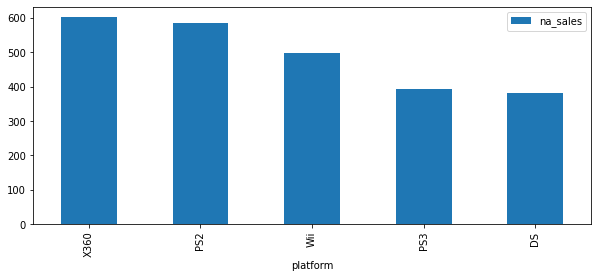

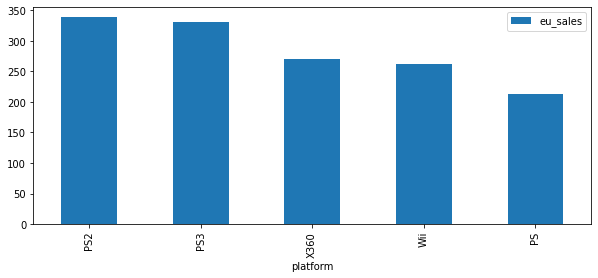

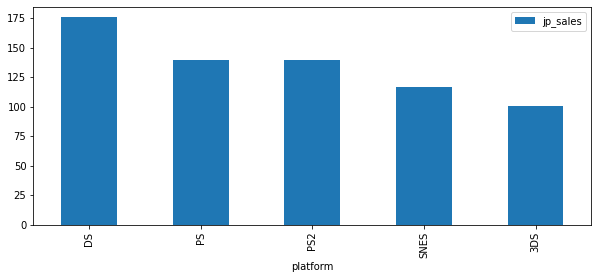

In [40]:
regions = ['na_sales', 'eu_sales','jp_sales']

for region in regions:
    sales_by_platform = ( 
        data
        .groupby('platform')[region]
        .sum()
        .reset_index()
    )
    sales_by_platform["market_share"] = sales_by_platform[region] / sales_by_platform[region].sum()
    
    sales_by_popular_platform = (
        sales_by_platform
        .sort_values(by=region, ascending=False)
        .head(5)
    )
    plt.figure(figsize=(10,4))
    sales_by_popular_platform.plot(kind='bar', x='platform', y= region, ax=plt.gca())
    plt.show()

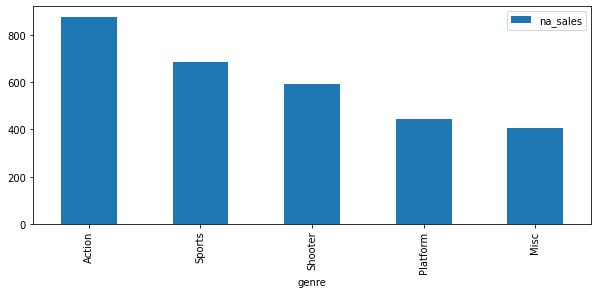

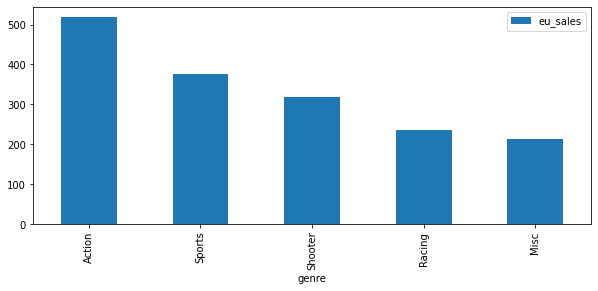

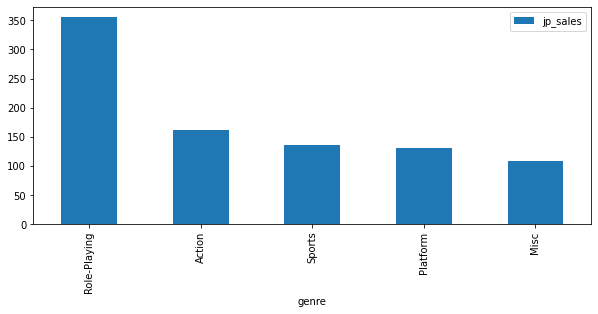

In [41]:
regions = ['na_sales', 'eu_sales','jp_sales']

for region in regions:
    sales_by_genre = ( 
        data
        .groupby('genre')[region]
        .sum()
        .reset_index()
    )
    sales_by_genre["market_share"] = sales_by_genre[region] / sales_by_genre[region].sum()
    
    sales_by_popular_genre = (
        sales_by_genre
        .sort_values(by=region, ascending=False)
        .head(5)
    )
    plt.figure(figsize=(10,4))
    sales_by_popular_genre.plot(kind='bar', x='genre', y= region, ax=plt.gca())
    plt.show()

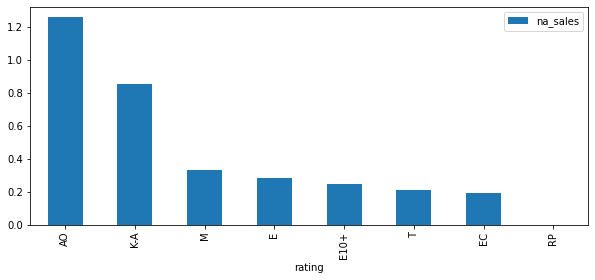

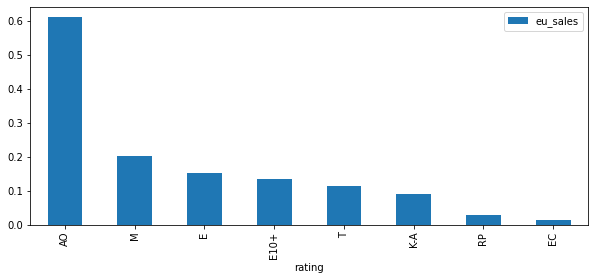

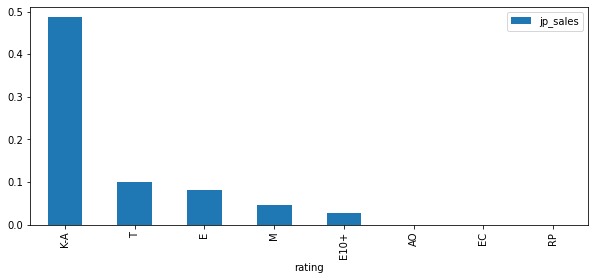

In [42]:
regions = ['na_sales', 'eu_sales','jp_sales']

for region in regions:
    sales_by_rating = ( 
        data
        .groupby('rating')[region]
        .mean()
        .reset_index()
        .sort_values(by=region, ascending=False)
        .reset_index(drop=True)
    )

    plt.figure(figsize=(10,4))
    sales_by_rating.plot(kind='bar', x='rating', y= region, ax=plt.gca())
    plt.show()

<div class="alert alert-warning">
<b>⚠️ Comentario del revisor:</b> Recuerda agregar conclsiones intermedias a todos las graficas, importante para comunicar lo que encontraste ! 

</div>

## Pruebas de Hipótesis

<div class="alert alert-warning">
<b>⚠️ Comentario del revisor:</b> Podrias graficar ambas distribuciones para ver si te da una idea de lo que deberiamso esperar de la hipotesis

</div>

In [43]:
print('H0: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas')
print('Ha: Las calificaciones son diferentes')
alpha=0.05

H0: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas
Ha: Las calificaciones son diferentes


In [44]:
results = st.ttest_ind(
    data.query("platform=='XOne'")['user_score'],
    data.query("platform=='PC'")['user_score']
)

print(f"p-value: {results.pvalue}")

if(results.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value: 0.006309849448515729
Rechazamos la hipótesis nula


**Conclusión**

El promedio de las calificaciones de los usuarios de las plataformas XOne y PC son diferentes debido a la prueba de hipótesis de `t de student` ya que la población es grande.

In [45]:
print('H0: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales')
print('Ha: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes')
alpha1=0.05

H0: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales
Ha: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes


In [46]:
results1 = st.ttest_ind(
    data.query("genre=='Action'")['user_score'],
    data.query("genre=='Sports'")['user_score']
)

print(f"p-value: {results.pvalue}")

if(results1.pvalue < alpha1):
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value: 0.006309849448515729
Rechazamos la hipótesis nula


**Conclisión**

Se plantearon las hipótesis considernado la nula como la igualdad del promedio de las calificaciones de los usuarios de los géneros Acción y Deportes, con la prueba `t de student` se comprobo que los promedios no son iguales.

## Conclusión final

En este ejercicio se está planteando un modelo de predicción para la venta de videojuegos.
Lo que se trabajo fue el encontrar las plataformas que han tenido más éxito a lo largo de la historia, hasta el año 2016, y que videojuegos han sido los más vendidos.
Se encontró que la plataforma más vendida al momento es la *PS2* con los datos que tenemos, con esta misma información encontramos que las plataformas actuales duran en promedio 10 años desde que salen al mercado hasta desaparecer o ya no presentar ventas de sus videojuegos.
El videojuego con más ventas en la historia de acuerdo con los datos es `Super Mario Bros.` para la plataforma `NES` de la compañía Nintendo.
De las distribuciones de las ventas por género de videojuego, los clasificados en *Acción* son los más vendidos, seguidos de los llamados de *Deportes*.
Dentro del análisis de los datos se buscó las plataformas más vendidas por regiones, en Norteamérica la plataforma más vendida es *Xbox 360*, en Europa *PS2* y en Japón *DS*.
Siguiendo con la clasificación de ventas por región el género de *Acción* es el más vendido en Norteamérica y Europa, mientras que en Japón son los *Juegos de Rol*.
En cuanto a las clasificaciones de ESRB en Norteamérica y Europa los juegos *AO* o Solo adultos son los más vendidos y en Japón la clasificación *K-A* o Kids to Adults (Everyone).
Con las pruebas de hipótesis se encontró que las calificaciones promedio de los usuarios de las plataformas *Xbox One* y *PC* son diferentes así como las calificaciones promedio para los juegos de *Acción* y *Deportes* también son diferentes.

<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b> Muchas gracias por tu proyecto! Te pido mostrar los resultados despues de cada code-block para que yo veo los resultados. Gracias :)

<div class="alert alert-info"> <b>Comentario del estudiante:</b> Gracias Maria, ya revise el por que no corrió mi código, ingrese mal la ruta, ya lo corregí</div>